<a href="https://colab.research.google.com/github/AlexSokol/ITMO_Sokolov/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2_v_1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание набора данных:**
Сердечно-сосудистые заболевания (ССЗ) являются главной причиной смерти по всему миру. ССЗ включают ишемическую болезнь сердца, цереброваскулярные заболевания, ревматическую болезнь сердца и другие проблемы сердца и сосудов. По данным Всемирной организации здравоохранения, ежегодно умирает 17,9 миллиона человек. Инфаркты и инсульты составляют более четырех пятых всех смертей от ССЗ, причем треть этих смертей происходят в возрасте до 70 лет. Была создана обширная база данных факторов, влияющих на возникновение инфаркта.

В рамках итоговой аттестации будет использоваться набор данных, который содержит информацию о заболеваниях сердца и различных факторах, связанных с этими заболеваниями. Набор данных включает следующие признаки: возраст, пол, пульс, артериальное давление, уровни сахара, креатинкиназы и тропонина в крови, а также целевая переменная, определяющая наличие сердечного заболевания.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
import numpy as np

In [22]:
# Загрузка данных
data = pd.read_csv('Heart Attack.csv')

data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Исследовательский анализ данных

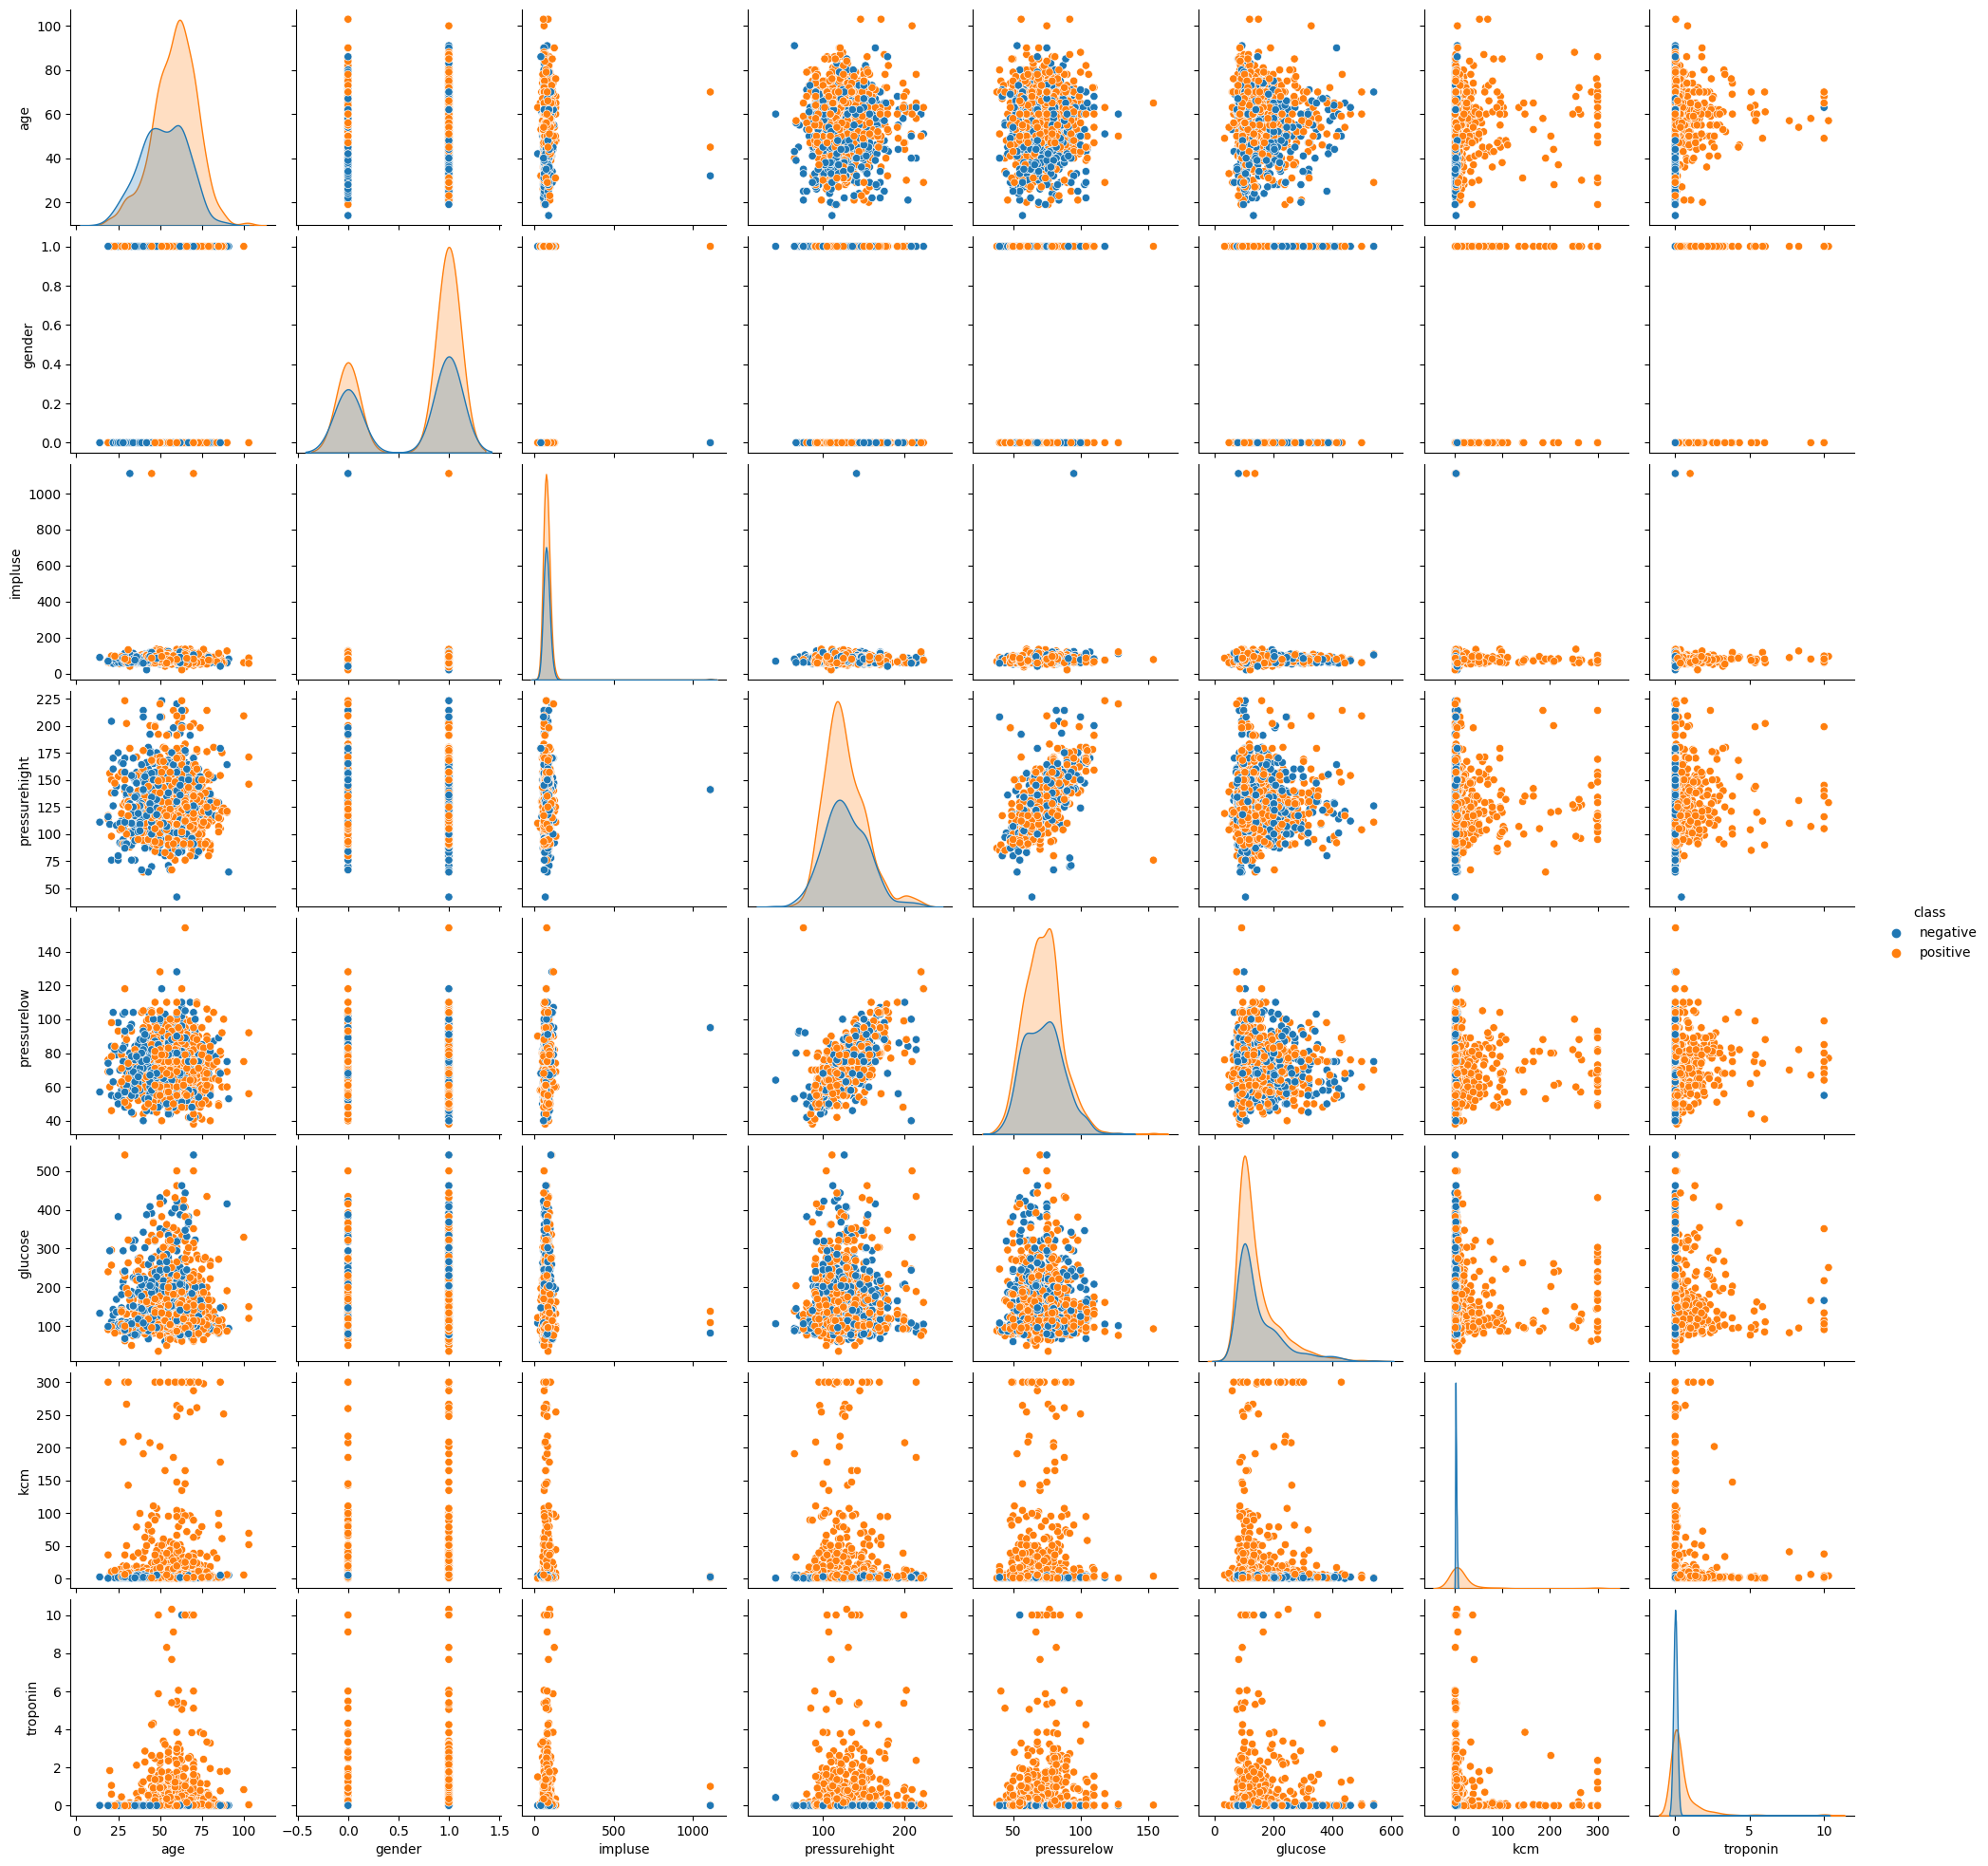

In [23]:
# Исследовательский анализ данных
sns.pairplot(data, hue='class', kind='scatter')
plt.show()

# **Предварительная обработка данных**:
Для предварительной обработки данных необходимо провести следующие шаги: удалить возможные дубликаты, заполнить пропущенные значения (если таковые имеются), провести кодирование категориальных признаков, провести нормализацию или стандартизацию числовых признаков при необходимости. Также может потребоваться отбор признаков с использованием методов выбора признаков или анализа корреляции для улучшения модели.

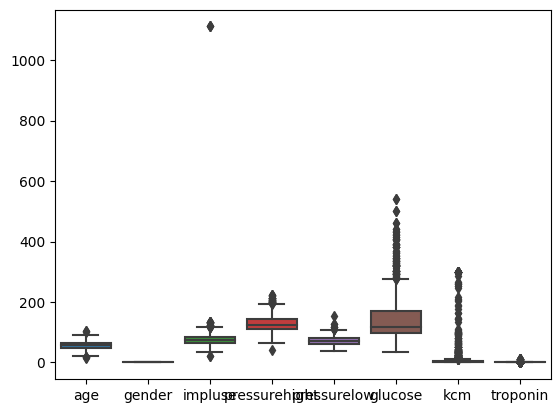

In [24]:
# Проверка наличия выбросов
sns.boxplot(data=data.drop('class', axis=1))
plt.show()

Пульс более 1000 явно является выбросом. Удалим его и повторим проверку.

In [25]:
data = data.drop(data[data['impluse'] > 1000].index, axis=0)

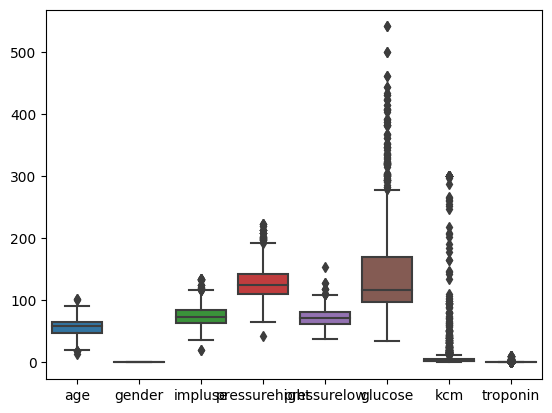

In [26]:
# Проверка наличия выбросов
sns.boxplot(data=data.drop('class', axis=1))
plt.show()

In [27]:
# Проход по каждому полю данных
for column in data.columns:
    # Извлечение значений поля
    values = pd.to_numeric(data[column], errors='coerce')

    # Вычисление среднего и стандартного отклонения
    mean = np.mean(values)
    std = np.std(values)

    # Вычисление границ выбросов (обычно используется наряду с z-оценкой)
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    # Проверка на наличие выбросов
    outliers = values[(values < lower_bound) | (values > upper_bound)]

    if len(outliers) > 0:
        print(f"Поле {column} содержит выбросы.")


Поле age содержит выбросы.
Поле impluse содержит выбросы.
Поле pressurehight содержит выбросы.
Поле pressurelow содержит выбросы.
Поле glucose содержит выбросы.
Поле kcm содержит выбросы.
Поле troponin содержит выбросы.


*С математической точки зрения, большинство полей содержит выбросы. Однако, с точки зрения медицины, эти значения валидны.*

---

# Постановка задачи и построение модели:
Задачей является построение модели машинного обучения, которая будет классифицировать наличие сердечно-сосудистого заболевания, на основе доступных признаков.

Для начала применим алгоритм многослойного перцептрона (MLP) и оценим его точность.

In [28]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

# Обучение и прогнозирование с использованием MLPClassifier
model = MLPClassifier(random_state=11, max_iter=5000, hidden_layer_sizes=(128, 64))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Вычисление метрики accuracy_score для оценки производительности модели
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7424242424242424

Точность недостаточно высокая. Стоит оценить важность признаков, для предсказания.

---

Мы можем использовать алгоритм случайного леса для оценки важности каждого признака на основе их вклада в качество предсказаний модели.

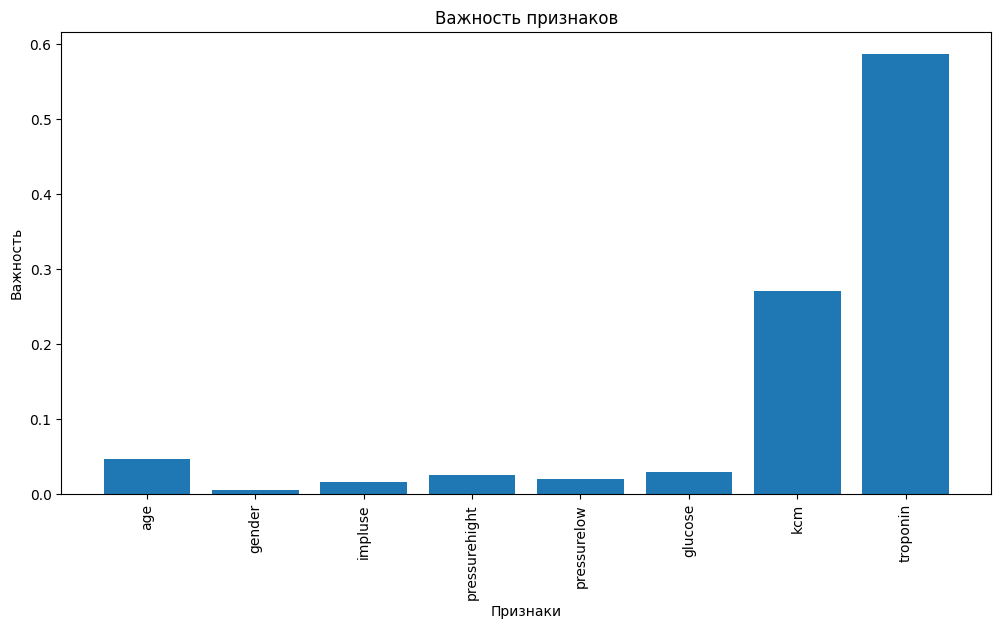

In [29]:
# Обучение модели случайного леса
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)

# Важность признаков
importance = model.feature_importances_
feature_names = X.columns

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.bar(feature_names, importance)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков')
plt.show()

Выбор наилучшей модели:
1. LogisticRegression - логистическая регрессия используется для бинарной классификации. Она основана на логистической функции и позволяет оценить вероятность принадлежности объекта к каждому классу.

2. SVC - метод опорных векторов, который позволяет разделить данные на два класса с помощью гиперплоскости в многомерном пространстве признаков.

3. RandomForestClassifier - случайный лес, который является ансамблем решающих деревьев. Он строит множество деревьев и выбирает ответ на основе голосования или усреднения ответов деревьев.

4. GradientBoostingClassifier - градиентный бустинг, который также является ансамблем решающих деревьев. Он последовательно строит деревья, учитывая ошибки предыдущих деревьев, и выбирает ответ на основе их суммы.

5. KNeighborsClassifier - метод k ближайших соседей, который определяет класс объекта на основе классов его ближайших соседей.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логистическая регрессия: точность = 0.7803
SVM: точность = 0.6515
Случайный лес: точность = 0.9811
Градиентный бустинг: точность = 0.9848
KNN: точность = 0.5947


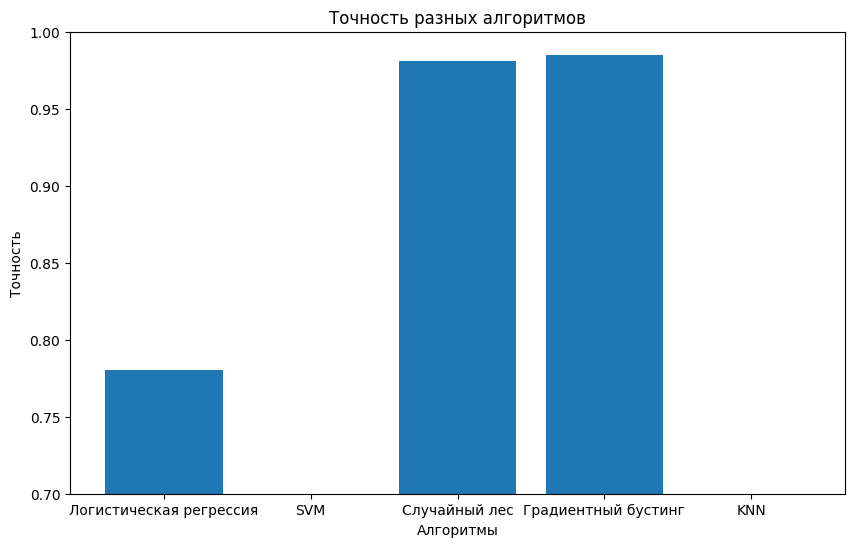

In [30]:
# Создание и обучение моделей
models = [
    LogisticRegression(random_state=11),
    SVC(random_state=11),
    RandomForestClassifier(random_state=11),
    GradientBoostingClassifier(random_state=11),
    KNeighborsClassifier()
]

model_names = ['Логистическая регрессия', 'SVM', 'Случайный лес', 'Градиентный бустинг', 'KNN']
accuracies = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'{name}: точность = {accuracy:.4f}')

# Визуализация точности моделей
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Алгоритмы')
plt.ylabel('Точность')
plt.title('Точность разных алгоритмов')
plt.ylim([0.7, 1.0])
plt.show()

Из полученных данных видно, что алгоритмы "Случайный лес" и "Градиентный бустинг" дают сопоставимую точность.

Для выбора оптимальной модели, сравним время выполнения этих алгоритмов.

In [31]:
# Измерение времени выполнения для случайного леса
start_time_rf = time.time()
rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(X_train, y_train)
end_time_rf = time.time()

# Измерение времени выполнения для градиентного бустинга
start_time_gb = time.time()
gb_model = GradientBoostingClassifier(random_state=11)
gb_model.fit(X_train, y_train)
end_time_gb = time.time()

# Вывод времени выполнения для каждой модели
print("Время выполнения случайного леса:", end_time_rf - start_time_rf)
print("Время выполнения градиентного бустинга:", end_time_gb - start_time_gb)


Время выполнения случайного леса: 0.22684383392333984
Время выполнения градиентного бустинга: 0.2640812397003174


Время выполнения "Случайного леса" меньше, выбираем этот алгоритм.

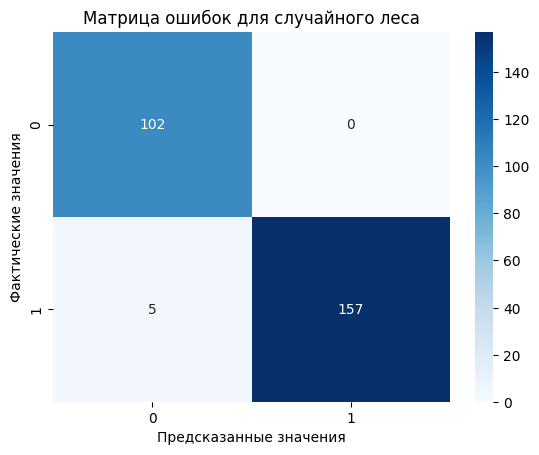

In [32]:
# Обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = rf_model.predict(X_test)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Предсказанные значения')
plt.ylabel('Фактические значения')
plt.title('Матрица ошибок для случайного леса')
plt.show()


Оценка модели и результатов: После построения модели каждый алгоритм будет оценен на основе нескольких метрик, таких как точность (accuracy), полнота (recall), precision, F1-мера

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Оценка точности (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print ('точность = ', accuracy)
# Оценка полноты (recall)
recall = recall_score(y_test, y_pred, pos_label='positive')
print ('полнота = ', recall)

# Оценка precision
precision = precision_score(y_test, y_pred, pos_label='positive')
print ('precision = ', precision)
# Оценка F1-меры
f1 = f1_score(y_test, y_pred, pos_label='positive')
print ('f1_score = ', f1)

точность =  0.9810606060606061
полнота =  0.9691358024691358
precision =  1.0
f1_score =  0.9843260188087775


Итого, на основе имеющихся данных, модель предсказывает наличие сердечно-сосудистых заболеваний, с достаточно высокой точностью.